<a href="https://colab.research.google.com/github/2k177/ML/blob/main/ML_foundation/notebooks/2_Linear_algebra_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Affine Transformation via Matrix Application

Let's say we have a vector  v :

In [2]:
import numpy as np
v = np.array([3,1])
v

array([3, 1])

Let's plot $v$ using `plot_vectors()` function (which is based on Hadrien Jean's `plotVectors()` function from [this notebook](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/2.7%20Eigendecomposition/2.7%20Eigendecomposition.ipynb), under [MIT license](https://github.com/hadrienj/deepLearningBook-Notes/blob/master/LICENSE)).

In [3]:
import matplotlib.pyplot as plt

In [4]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

(-10.0, 10.0)

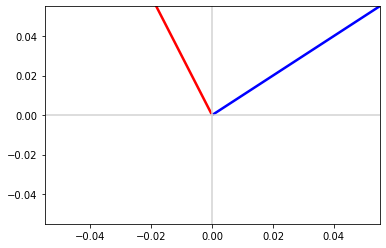

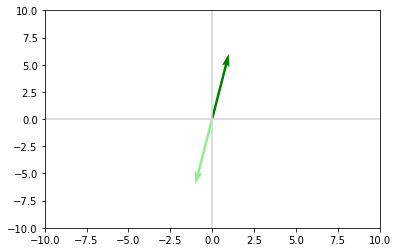

In [13]:
plot_vectors([[-1, 3], [2, 2]], ['red', 'blue'])
plot_vectors([[1, 6], [-1, -6]], ['green', 'lightgreen'])
plt.xlim(-10, 10) #x-axis range
plt.ylim(-10, 10) # y-axis range

"Applying" a matrix to a vector (i.e., performing matrix-vector multiplication) can linearly transform the vector, e.g, rotate it or rescale it.

The identity matrix, introduced earlier, is the exception that proves the rule: Applying an identity matrix does not transform the vector:

In [15]:
I = np.array([[1,0], [0,1]])
I

array([[1, 0],
       [0, 1]])

In [16]:
Iv = np.dot(I,v)
Iv

array([3, 1])

In [17]:
v == Iv

array([ True,  True])

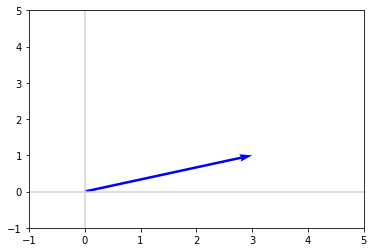

In [19]:
plot_vectors([Iv], ['blue'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

In contrast, consider this matrix (let's call it  E ) that flips vectors over the  x -axis:

In [20]:
E = np.array([[1,0],[0,-1]])
E

array([[ 1,  0],
       [ 0, -1]])

In [22]:
Ev = np.dot(E, v)
Ev

array([ 3, -1])

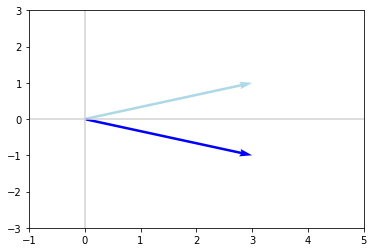

In [24]:
plot_vectors([Iv, Ev], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-3, 3)

Or, this matrix F, which flips vector over the y axis:

In [25]:
F = np.array([[-1,0], [0,1]])
F

array([[-1,  0],
       [ 0,  1]])

In [26]:
Fv = np.dot(F, v)
Fv

array([-3,  1])

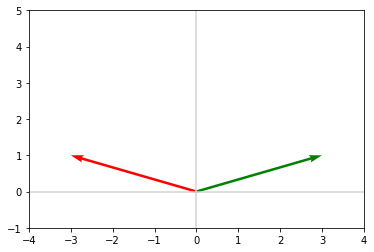

In [32]:
plot_vectors([v, Fv], ['green', 'red'])
plt.xlim(-4, 4)
_ = plt.ylim(-1, 5)

Applying a flipping matrix is an example of an **affine transformation**: a change in geometry that may adjust distances or angles between vectors, but preserves parallelism between them.

In addition to flipping a matrix over an axis (a.k.a., *reflection*), other common affine transformations include:
* *Scaling* (changing the length of vectors)
* *Shearing* (example of this on the Mona Lisa coming up shortly)
* *Rotation* 

(See [here](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for an outstanding blog post on affine transformations in Python, including how to apply them to images as well as vectors.)

A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees). As an example, let's see what happens when we apply this matrix  A  to the vector  v :

In [33]:
A = np.array([[1,4], [2,-2]])
A

array([[ 1,  4],
       [ 2, -2]])

In [34]:
v

array([3, 1])

In [35]:
Av = np.dot(A, v)
Av

array([7, 4])

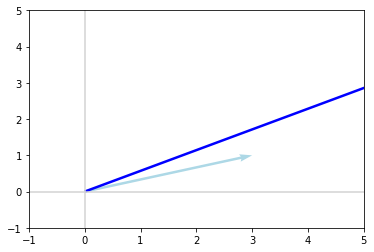

In [36]:
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

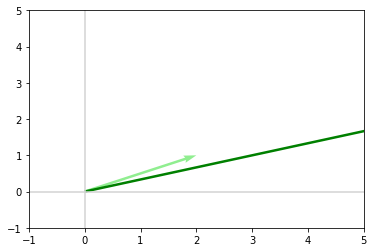

In [37]:
v2 = np.array([2,1])
plot_vectors([v2, np.dot(A, v2)], ['lightgreen', 'green'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

We can concatenate several vectors together into a matrix (say,  V ), where each column is a separate vector. Then, whatever linear transformations we apply to  V  will be independently applied to each column (vector):

In [38]:
v

array([3, 1])

In [39]:
# recall that we need to convert array to 2D to transpose into column, e.g.:
np.matrix(v).T 

matrix([[3],
        [1]])

In [42]:
v3  =np.array([-3,-1])
v4 = np.array([-1,1])
v3

array([-3, -1])

In [43]:
v4

array([-1,  1])

In [46]:
V = np.concatenate((np.matrix(v).T,
                    np.matrix(v2).T,
                    np.matrix(v3).T,
                    np.matrix(v4).T), axis=1)
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [47]:
IV = np.dot(I, V)
IV

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [50]:
A

array([[ 1,  4],
       [ 2, -2]])

In [51]:
V

matrix([[ 3,  2, -3, -1],
        [ 1,  1, -1,  1]])

In [49]:
AV = np.dot(A, V)
AV

matrix([[ 7,  6, -7,  3],
        [ 4,  2, -4, -4]])

In [52]:
# function to convert column of matrix to 1D vector: 
def vectorfy(mtrx, clmn):
    return np.array(mtrx[:,clmn]).reshape(-1)

In [53]:
vectorfy(V, 0)

array([3, 1])

In [54]:
vectorfy(V, 1)

array([2, 1])

In [56]:
vectorfy(V, 3)

array([-1,  1])

In [57]:
vectorfy(V, 0) == v

array([ True,  True])

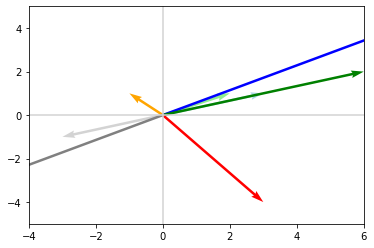

In [58]:
plot_vectors([vectorfy(V, 0), vectorfy(V, 1), vectorfy(V, 2), vectorfy(V, 3),
             vectorfy(AV, 0), vectorfy(AV, 1), vectorfy(AV, 2), vectorfy(AV, 3)], 
            ['lightblue', 'lightgreen', 'lightgray', 'orange',
             'blue', 'green', 'gray', 'red'])
plt.xlim(-4, 6)
_ = plt.ylim(-5, 5)

An **eigenvector** (*eigen* is German for "typical"; we could translate *eigenvector* to "characteristic vector") is a special vector $v$ such that when it is transformed by some matrix (let's say $A$), the product $Av$ has the exact same direction as $v$.

An **eigenvalue** is a scalar (traditionally represented as $\lambda$) that simply scales the eigenvector $v$ such that the following equation is satisfied: 

$Av = \lambda v$

In [59]:
A

array([[ 1,  4],
       [ 2, -2]])

Eigenvectors and eigenvalues can be derived algebraically (e.g., with the [QR algorithm](https://en.wikipedia.org/wiki/QR_algorithm), which was independently developed in the 1950s by both [Vera Kublanovskaya](https://en.wikipedia.org/wiki/Vera_Kublanovskaya) and John Francis), however this is outside scope of the *ML Foundations* series. We'll cheat with NumPy `eig()` method, which returns a tuple of: 

* a vector of eigenvalues
* a matrix of eigenvectors

In [65]:
lambdas, V = np.linalg.eig(A)
A 

array([[ 1,  4],
       [ 2, -2]])

In [61]:
lambdas

array([ 2.70156212, -3.70156212])

Let's confirm that $Av = \lambda v$ for the first eigenvector: 

In [62]:
V

array([[ 0.9202015 , -0.64799372],
       [ 0.39144501,  0.76164568]])

In [64]:
v = V[:,0]
v

array([0.9202015 , 0.39144501])

In [66]:
lambduh = lambdas[0] # note that "lambda" is reserved term in Python
lambduh

2.7015621187164243

In [67]:
lambduh * v

array([2.48598152, 1.057513  ])

In [68]:
Av = np.dot(A, v)
Av

array([2.48598152, 1.057513  ])

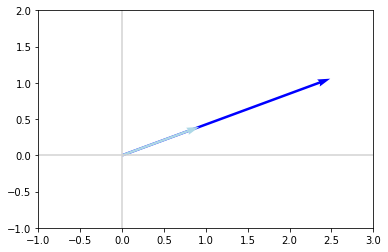

In [70]:
plot_vectors([Av, v], ['blue', 'lightblue'])
plt.xlim(-1, 3)
_ = plt.ylim(-1, 2)

Using the PyTorch eig() method, we can do exactly the same:

In [71]:
A

array([[ 1,  4],
       [ 2, -2]])

In [74]:
import torch
A_p = torch.tensor([[-1,4],[2,-2.]])
A_p 

tensor([[-1.,  4.],
        [ 2., -2.]])

In [75]:
lambdas_cplx, V_cplx = torch.linalg.eig(A_p) # outputs complex numbers because real matrices can have complex eigenvectors

In [76]:
V_p = V_cplx.float()
V_p

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at  ../aten/src/ATen/native/Copy.cpp:250.)
  """Entry point for launching an IPython kernel.


tensor([[ 0.8601, -0.7645],
        [ 0.5101,  0.6446]])

In [77]:
v_p = V_p[:,0]
v_p

tensor([0.8601, 0.5101])

In [78]:
lambdas_cplx

tensor([ 1.3723+0.j, -4.3723+0.j])

In [79]:
lambdas_p = lambdas_cplx.float()
lambdas_p

tensor([ 1.3723, -4.3723])

In [80]:
Av_p = torch.matmul(A_p, v_p) # matmul() expects float-typed tensors
Av_p

tensor([1.1803, 0.7000])

In [82]:
lambdas_p * v_p

tensor([ 1.1803, -2.2303])

### Eigenvectors in >2 Dimensions

While plotting gets trickier in higher-dimensional spaces, we can nevertheless find and use eigenvectors with more than two dimensions. Here's a 3D example (there are three dimensions handled over three rows):

In [83]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X

array([[25,  2,  9],
       [ 5, 26, -5],
       [ 3,  7, -1]])

In [84]:
lambdas_X, V_X = np.linalg.eig(X) 

In [85]:
V_X

array([[-0.71175736, -0.6501921 , -0.34220476],
       [-0.66652125,  0.74464056,  0.23789717],
       [-0.22170001,  0.15086635,  0.90901091]])

In [86]:
lambdas_X

array([29.67623202, 20.62117365, -0.29740567])

#####Confirm  Xv=λv  for an example eigenvector:

In [87]:
v_X = V_X[:,0] 
v_X

array([-0.71175736, -0.66652125, -0.22170001])

In [88]:
lambda_X = lambdas_X[0] 
lambda_X

29.676232023948902

In [89]:
np.dot(X, v_X) # matrix multiplication

array([-21.12227645, -19.77983919,  -6.5792208 ])

In [90]:
lambda_X * v_X

array([-21.12227645, -19.77983919,  -6.5792208 ])